In [30]:
import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sn
from pathlib import Path
from bokeh.models import HoverTool
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the data csv file from the Resources folder
csv_path = Path("./Resources/owid-co2-data.csv")
emissions_df = pd.read_csv(csv_path)

# Review the first and last five rows of the DataFrame
# print(emissions_df.head())
# print(emissions_df.tail())

In [5]:
# Create Second Dataframe with no Summary Data
country_emissions_df = emissions_df.copy()
country_emissions_df['iso_code'].replace('', np.nan, inplace=True)
country_emissions_df.dropna(subset = ['iso_code'], inplace=True)

# country_emissions_df

In [8]:
# Create Third Dataframe with World Data
world_emissions_df = emissions_df.copy()
world_emissions_df = world_emissions_df[world_emissions_df['country'] == 'World']

world_emissions_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
49810,World,1750,NaN,7.456645e+08,NaN,NaN,NaN,9.351,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49811,World,1751,NaN,NaN,NaN,NaN,NaN,9.351,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49812,World,1752,NaN,NaN,NaN,NaN,NaN,9.354,0.004,0.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49813,World,1753,NaN,NaN,NaN,NaN,NaN,9.354,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49814,World,1754,NaN,NaN,NaN,NaN,NaN,9.358,0.004,0.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50077,World,2017,NaN,7.599822e+09,1.104307e+14,1507.923,0.198,36096.738,572.547,1.612,...,100.0,100.0,0.394,1.039,1.511,0.078,48251.879,47031.820,0.004,0.0
50078,World,2018,NaN,7.683790e+09,1.136302e+14,1569.218,0.204,36826.508,729.772,2.022,...,100.0,100.0,0.399,1.058,1.536,0.079,49368.039,47980.469,-0.004,-0.0
50079,World,2019,NaN,7.764951e+09,NaN,1617.507,0.208,37082.559,256.049,0.695,...,100.0,100.0,0.404,1.076,1.561,0.081,49758.230,48116.559,0.000,0.0
50080,World,2020,NaN,7.840953e+09,NaN,1637.537,0.209,35264.086,-1818.472,-4.904,...,100.0,100.0,0.410,1.094,1.585,0.082,NaN,NaN,0.000,0.0


In [15]:
# Create Fourth Dataframe with Aggregate Data
agg_emissions_df = emissions_df.copy()
agg_emissions_df['iso_code'].replace('', np.nan, inplace=True)
agg_emissions_df = agg_emissions_df[agg_emissions_df['iso_code'].isnull()]
agg_emissions_df = agg_emissions_df[agg_emissions_df['country'] != 'World']

agg_emissions_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
172,Africa,1750,NaN,7.627809e+07,NaN,0.000,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,Africa,1751,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Africa,1752,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Africa,1753,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,Africa,1754,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48598,Upper-middle-income countries,2017,NaN,2.500617e+09,NaN,949.087,0.380,15586.028,298.620,1.953,...,68.288,33.912,0.151,0.337,0.512,0.024,19745.609,20197.459,-1768.118,-11.344
48599,Upper-middle-income countries,2018,NaN,2.516786e+09,NaN,977.858,0.389,15964.710,378.681,2.430,...,69.026,34.080,0.154,0.345,0.523,0.025,20273.920,20726.900,-1723.914,-10.798
48600,Upper-middle-income countries,2019,NaN,2.530546e+09,NaN,1010.767,0.399,16338.438,373.727,2.341,...,69.598,34.257,0.157,0.353,0.535,0.025,20632.350,21075.539,-1762.479,-10.787
48601,Upper-middle-income countries,2020,NaN,2.541464e+09,NaN,1055.618,0.415,16219.841,-118.597,-0.726,...,69.982,34.448,0.160,0.361,0.546,0.026,NaN,NaN,-1798.810,-11.090


In [6]:
# Create a visual aggregation explore the population by year
population_by_year = emissions_df[emissions_df['year']>=1800]

population_by_year.hvplot.bar(x='year', y='population', 
                                 yformatter='%.0f', 
                                 ylabel='Population',
                                 groupby='country',
                                 yticks=(5), xlabel='Year',
                                 color='green',
                                 title='Population by Country by Year')

:DynamicMap   [country]
   :Bars   [year]   (population)

In [7]:
# Create a visual aggregation explore the emissions by year
ghg_by_year = emissions_df[emissions_df['year']>=1990]

ghg_by_year.hvplot.line(x='year', y='total_ghg', 
                                 yformatter='%.0f', 
                                 ylabel='Total GHG',
                                 groupby='country',
                                 yticks=(5), xlabel='Year',
                                 title='Total GHG by Country by Year')

:DynamicMap   [country]
   :Curve   [year]   (total_ghg)

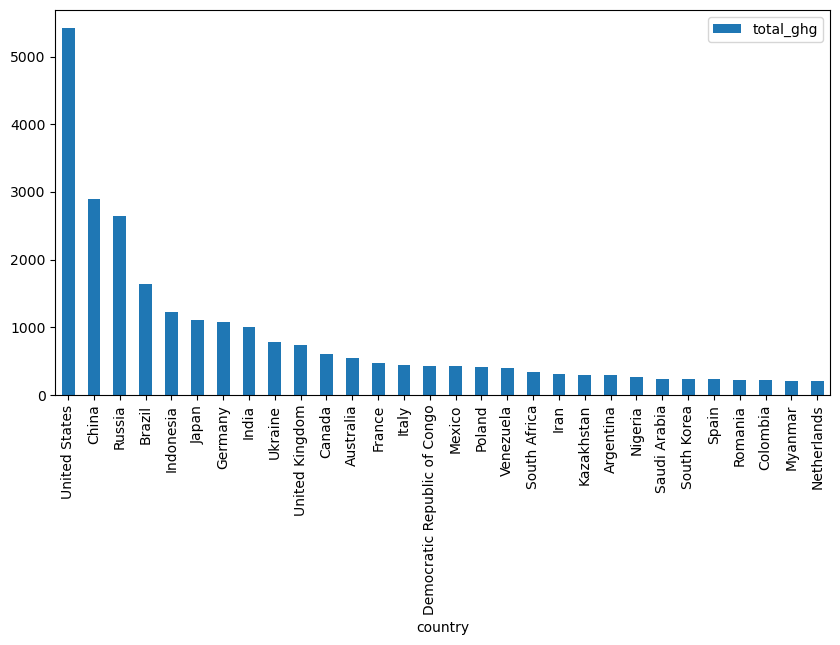

In [79]:
top_ghg_by_year = country_emissions_df[country_emissions_df['year']==1990].sort_values(by='total_ghg', ascending=False).head(30).plot.bar(x='country',y='total_ghg',figsize=(10,5));

In [21]:
# Create a visual to explore the total emissions and total population by year
total_by_year = world_emissions_df[world_emissions_df['year']>=1990]

ghg_total = total_by_year.hvplot.line(x='year', y='total_ghg', 
                                 yformatter='%.0f', 
                                 ylabel='Total GHG',
                                 yticks=(5), xlabel='Year',
                                 title='Total GHG by Year')

population_total = total_by_year.hvplot.line(x='year', y='population', 
                                 yformatter='%.0f', 
                                 ylabel='Total Population',
                                 yticks=(5), xlabel='Year',
                                 title='Total Population by Year')

ghg_total + population_total

:Layout
   .Curve.I  :Curve   [year]   (total_ghg)
   .Curve.II :Curve   [year]   (population)

In [29]:
# Create a visual to explore the total emissions in various areas
region_data = agg_emissions_df[agg_emissions_df['year']>=1990]

region_data.hvplot.bar(x='year', y='total_ghg',
                                   groupby='country',
                                 yformatter='%.0f',
                                 ylabel='Total Population',
                                 yticks=(5), xlabel='Year',
                                 title='Total Population by Year')

:DynamicMap   [country]
   :Bars   [year]   (total_ghg)